In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
df=pd.read_csv(r'C:/Users/navee/Downloads/Boston.csv')

In [4]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

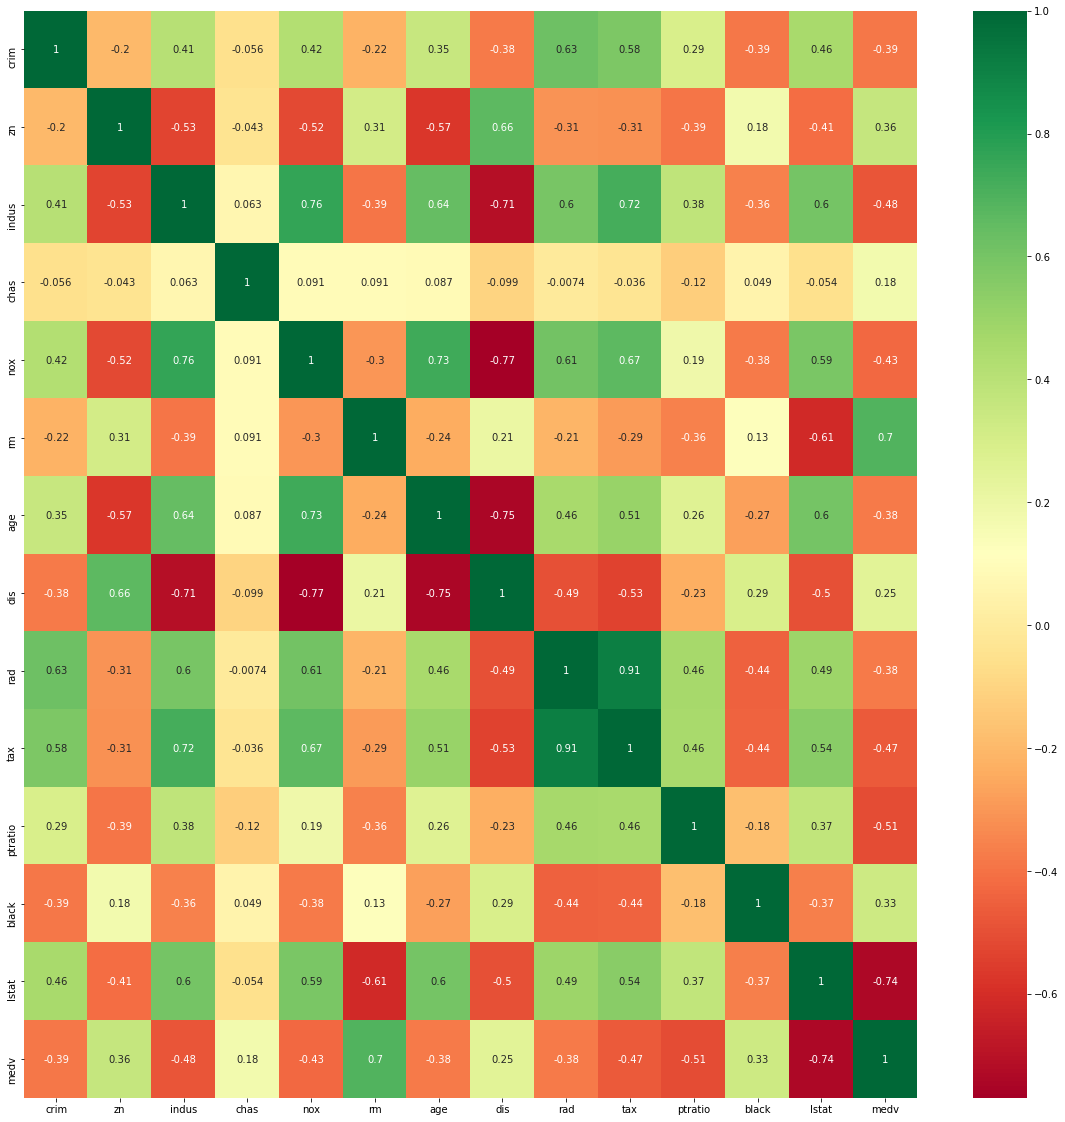

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [10]:
X=df.drop(columns=['medv'])
y=df.medv

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [12]:
scalar_transformer=Pipeline(steps=[('scaling',StandardScaler())])

In [13]:
features=X.columns

# basic random forest model 

In [14]:
preprocessor1=ColumnTransformer(transformers=[
      ('T1',scalar_transformer,features)
      ],sparse_threshold=0)

In [18]:
rf=RandomForestRegressor()
model=Pipeline(steps=[('preprocessor1',preprocessor1),
                ('random_forest_model',rf)
                ])

In [19]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor1',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('T1',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object'))])),
                ('random_forest_model', RandomForestRegressor())])

In [20]:
y_pred=model.predict(X_test)

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8628411662932888

# randomized searchcv for hyper parameter tuning, for best practices use optuna

In [22]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [23]:
rf = RandomForestRegressor()

rf_random_grid = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

model2=Pipeline(steps=[('preprocessor1',preprocessor1),
                ('random_forest_model',rf_random_grid)
                ])

In [24]:
model2.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


Pipeline(steps=[('preprocessor1',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('T1',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object'))])),
                ('random_forest_model',
                 RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                                    n_iter=100, n_jobs=-1,
                                    param_distributions={'bootstrap': [True,
                                                                       False],
                                                         'max_depth': [10, 20,
                                                                       30, 40,
      

In [26]:
rf_random_grid.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [29]:
r_pred=model2.predict(X_test)

In [30]:
r2_score(y_test, r_pred)

0.8602036176123896

# grid search approach for hyper parameter tuning

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2,3,5,8,11],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300,500,800,900,1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
rf_grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
model3=Pipeline(steps=[('preprocessor1',preprocessor1),
                ('random_forest_model',rf_grid_search)
                ])

In [32]:
model3.fit(X_train,y_train)

Fitting 5 folds for each of 1260 candidates, totalling 6300 fits


Pipeline(steps=[('preprocessor1',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('T1',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object'))])),
                ('random_forest_model',
                 GridSearchCV(cv=5, estimator=RandomForestRegressor(),
                              n_jobs=-1,
                              param_grid={'bootstrap': [True],
                                          'max_depth': [80, 90, 100, 110],
                                          'max_features': [2, 3, 5, 8, 11],
                                          'min_samples_leaf': [3, 4, 5],
                                          'min_samples_sp

In [33]:
rf_grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [37]:
p_pred=model3.predict(X_test)

In [38]:
r2_score(y_test,p_pred)

0.9003907573811755

In [39]:
import pickle
pickle.dump(model,open('basic_rf_model.pkl','wb'))

# Randomized search cv model
pickle.dump(model2,open('rf_ramdom_model.pkl','wb'))

# Gridsreach cv model
pickle.dump(model3,open('rf_grid_model.pkl','wb'))